In [ ]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624,False,True,False,False,True,False,False,False
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032,True,False,False,True,False,False,False,False
5,8.64,2.0,2.55,1.71,0.48,89.33,60.2028,False,False,False,True,False,True,False,False
12,41.79,3.0,4.60,1.77,0.11,86.95,88.1328,False,False,True,True,False,False,False,False
14,9.91,2.0,2.32,1.26,0.34,41.72,28.9914,True,False,False,False,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

X, y = df_encoded.drop(columns="Trip_Price"), df_encoded["Trip_Price"]

X.shape, y.shape

((562, 14), (562,))

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y,test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size=0.11, random_state=42)

X_train_full.shape, X_train.shape, X_val.shape, X_test.shape

((505, 14), (449, 14), (56, 14), (57, 14))

<Axes: >

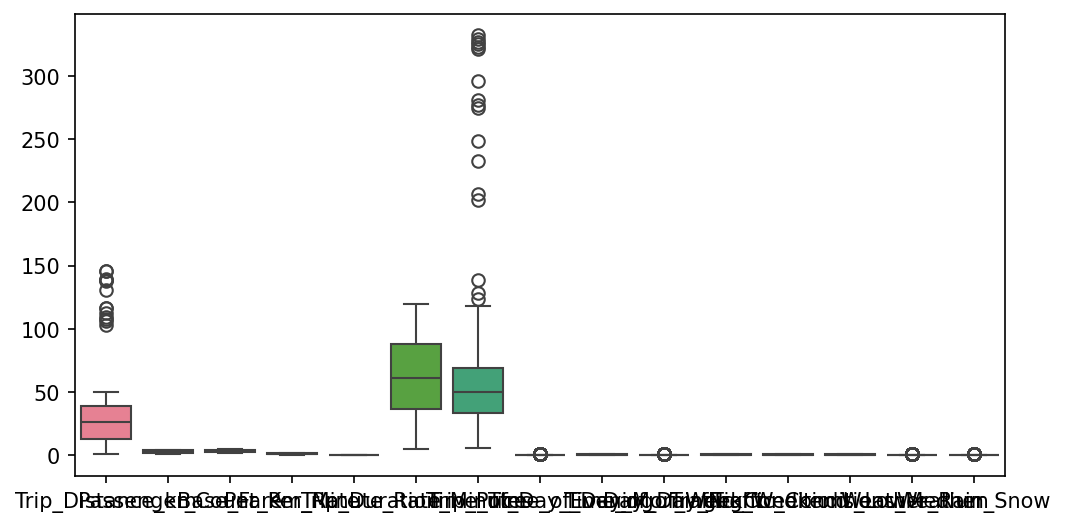

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_encoded)

<Axes: >

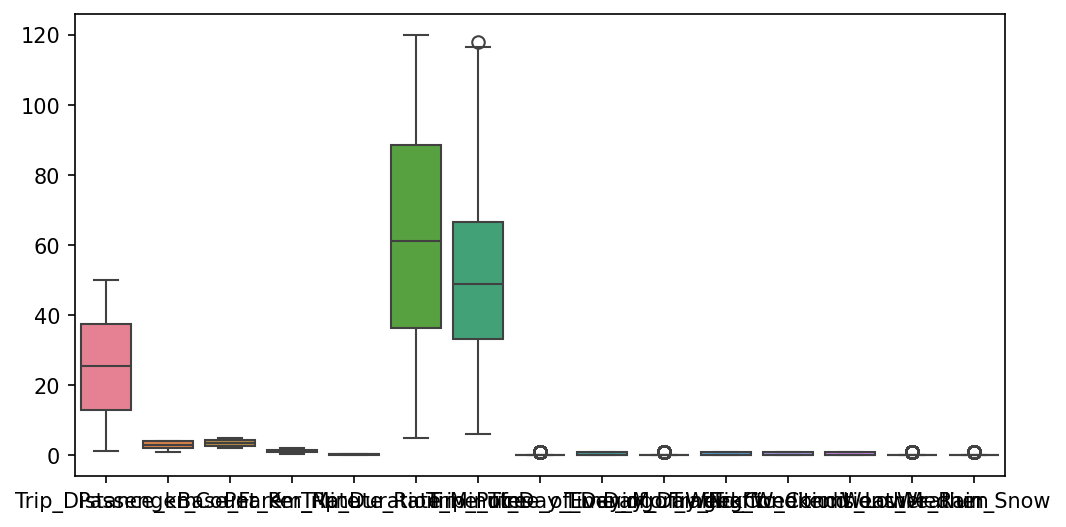

In [13]:
for col in ["Trip_Price", "Trip_Distance_km"]:

    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    # Behåll bara värden inom [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    df_encoded = df_encoded[
        (df_encoded[col] >= Q1 - 1.5 * IQR) &
        (df_encoded[col] <= Q3 + 1.5 * IQR)
    ]
plt.subplots(1, figsize=(8,4), dpi=150)
sns.boxplot(df_encoded)

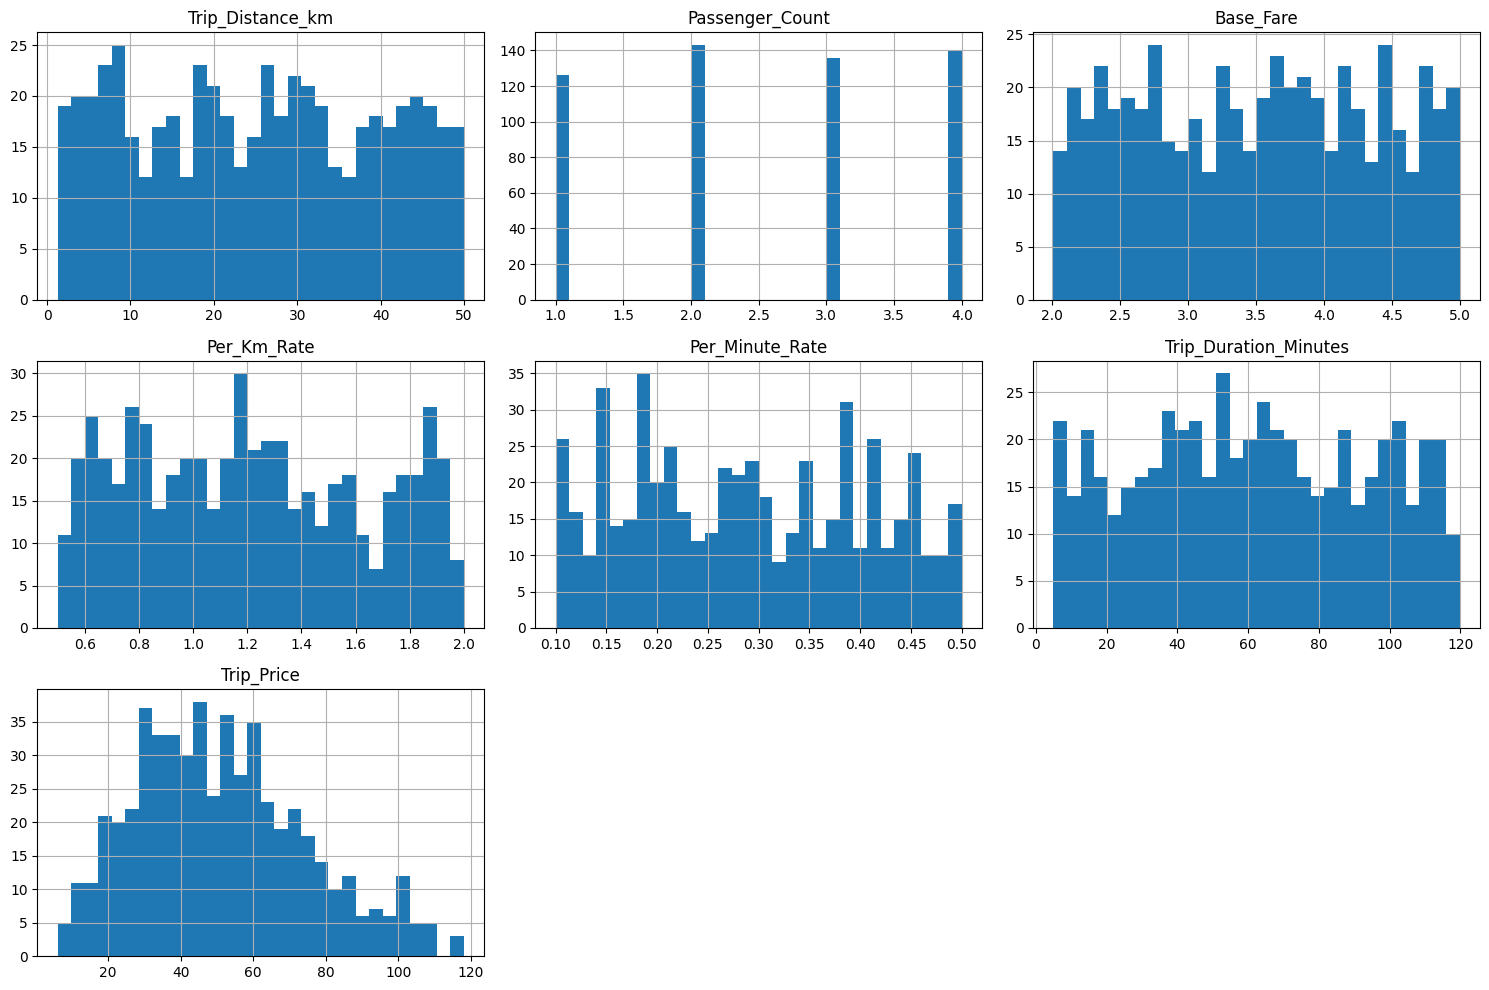

In [14]:
import matplotlib.pyplot as plt
df_encoded.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_val = scaler.transform(X_val)

print(f"{scaled_X_train.max()=:.3f}")
print(f"{scaled_X_train.min()=:.3f}")
print(f"{scaled_X_train.std()=:.3f}\n")
print(f"{scaled_X_test.max()=:.3f}")
print(f"{scaled_X_test.min()=:.3f}")
print(f"{scaled_X_test.std()=:.3f}\n")
print(f"{scaled_X_val.max()=:.3f}")
print(f"{scaled_X_val.min()=:.3f}")
print(f"{scaled_X_val.std()=:.3f}")

scaled_X_train.max()=5.339
scaled_X_train.min()=-1.754
scaled_X_train.std()=1.000

scaled_X_test.max()=3.684
scaled_X_test.min()=-1.694
scaled_X_test.std()=0.976

scaled_X_val.max()=3.551
scaled_X_val.min()=-1.708
scaled_X_val.std()=0.985


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

minmax_X_train = scaler.transform(X_train)
minmax_X_test = scaler.transform(X_test)
minmax_X_val = scaler.transform(X_val)

print(f"{minmax_X_train.max()=:.3f}")
print(f"{minmax_X_train.min()=:.3f}")
print(f"{minmax_X_train.std()=:.3f}\n")
print(f"{minmax_X_test.max()=:.3f}")
print(f"{minmax_X_test.min()=:.3f}")
print(f"{minmax_X_test.std()=:.3f}\n")
print(f"{minmax_X_val.max()=:.3f}")
print(f"{minmax_X_val.min()=:.3f}")
print(f"{minmax_X_val.std()=:.3f}")

minmax_X_train.max()=1.000
minmax_X_train.min()=0.000
minmax_X_train.std()=0.397

minmax_X_test.max()=1.000
minmax_X_test.min()=0.000
minmax_X_test.std()=0.390

minmax_X_val.max()=1.000
minmax_X_val.min()=0.000
minmax_X_val.std()=0.405


7

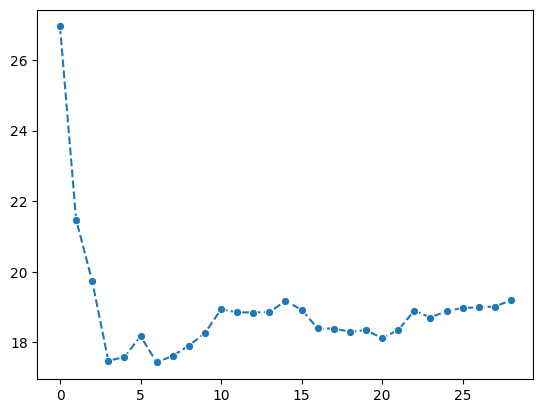

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import seaborn as sns

error_list = []
for k in range(1,30):
    test_model = KNeighborsRegressor(n_neighbors=k)
    test_model.fit(scaled_X_train, y_train)
    y_pred = test_model.predict(scaled_X_val)
    error = root_mean_squared_error(y_val, y_pred)
    error_list.append(error)

sns.lineplot(error_list, marker="o", linestyle="--")

best_index = min(error_list)
best_k = error_list.index(best_index)+1
best_k

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=best_k),
    "XGBoost": XGBRegressor(),
    "RidgeCV": RidgeCV(),
    "ElasticNet": ElasticNetCV()
}
scalers = {
    "StandardScaler": StandardScaler(), 
    "MinMaxScaler": MinMaxScaler()
    }

result = []
for key, model in models.items():
    for name, scaler in scalers.items():
        scaler.fit(X_train)

        scaled_X_train = scaler.transform(X_train)
        scaled_X_test = scaler.transform(X_test)
        scaled_X_val = scaler.transform(X_val)
        
        model.fit(scaled_X_train, y_train)
        y_pred = model.predict(scaled_X_val)
        
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = root_mean_squared_error(y_val, y_pred)
        
        result.append({
            "model": key,
            "scaler": name,
            "mae": mae,
            "mse": mse,
            "rmse": rmse
        })

result_df = pd.DataFrame(result)
result_df.sort_values(by="rmse")

,model,scaler,mae,mse,rmse
6,XGBoost,StandardScaler,3.690193,22.954100,4.791044
7,XGBoost,MinMaxScaler,3.690193,22.954100,4.791044
2,RandomForest,StandardScaler,3.619147,23.983599,4.897305
3,RandomForest,MinMaxScaler,3.717695,24.044178,4.903486
11,ElasticNet,MinMaxScaler,6.803663,74.291749,8.619266
10,ElasticNet,StandardScaler,7.170981,98.677707,9.933665
9,RidgeCV,MinMaxScaler,7.462020,109.000779,10.440344
8,RidgeCV,StandardScaler,7.560910,112.212814,10.593055
1,LinearRegression,MinMaxScaler,7.563388,112.294814,10.596925
0,LinearRegression,StandardScaler,7.563388,112.294814,10.596925
